In [2]:
import torch

inputs = torch.tensor(
    [[0.43 , 0.15 , 0.89], #Your
    [0.55 , 0.87 , 0.66], #journey
    [0.57 , 0.85 , 0.64], #starts
    [0.22 , 0.58 , 0.33], #with
    [0.77 , 0.25, 0.10], #one
    [0.05 , 0.80, 0.55]]#step
)

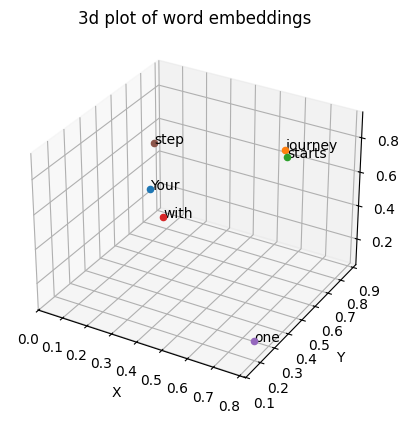

In [3]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

words = ['Your' , 'journey' , 'starts' , 'with' , 'one' , 'step']

x_co = inputs[:,0].numpy()
y_co = inputs[:,1].numpy()
z_co = inputs[:,2].numpy()

#create 3d plot

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for x , y , z , word in zip(x_co , y_co , z_co , words):
    ax.scatter(x,y,z)
    ax.text(x,y,z,word,fontsize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')  

plt.title("3d plot of word embeddings")
plt.show()

In [5]:
query = inputs[1]

attn_score_2 = torch.empty(inputs.shape[0])
for i , x_i in enumerate(inputs):
    attn_score_2[i] = torch.dot(x_i , query)
print(attn_score_2)    

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [6]:
attn_score_2_norm = attn_score_2/attn_score_2.sum()

print("Attention_weights",attn_score_2_norm)
print("sum", attn_score_2_norm.sum())

Attention_weights tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
sum tensor(1.0000)


In [9]:
def softmax_naive(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)

attn_score_2_naive = softmax_naive(attn_score_2)

print("attention weights :" , attn_score_2_naive)
print("sum", attn_score_2_naive.sum())

attention weights : tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
sum tensor(1.)


In [11]:
attn_weights_2 = torch.softmax(attn_score_2 , dim=0)
print("attention weights",attn_weights_2 , "\nsum",attn_weights_2.sum())

attention weights tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581]) 
sum tensor(1.)


In [12]:
query = inputs[1]

context_vector_2 = torch.zeros(query.shape)
for i , x_i in enumerate(inputs):
    context_vector_2 += attn_weights_2[i] * x_i
print(context_vector_2)    

tensor([0.4419, 0.6515, 0.5683])


In [13]:
attention_scores = inputs@inputs.T
print(attention_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [16]:
attention_weights = torch.softmax(attention_scores , dim=-1)
print(attention_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [18]:
print(inputs)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])


In [17]:
context_vectors = attention_weights@inputs
print(context_vectors)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
